In [129]:
# These are the required imports for our data loading

import os
import numpy as np
from PIL import Image
from numpy.testing.print_coercion_tables import print_new_cast_table
from tqdm import tqdm

In [130]:
DATA_DIR = 'Train1' # This is our data directory in our root dr
IMG_SIZE = 28 # We will resize all images to 28x28
# why 28x28? --> this is the size of the MNIST dataset
# and also this is a really good general size, not too small, not too big
# Also we will avoid overfitting, and really big matrices.

OUTPUT_FEATURES_FILE = 'features_X.npy' # We create the features file
OUTPUT_LABELS_FILE = 'labels_y.npy' # We create the labels file

In [131]:
def create_dataset_from_folders(data_dir):
    """
    This function iterates through the given directory and it's sub directories,
    and processes each image file, it returns a feature and a label array.
    """

    # These are the arrays, where we will collect our data
    image_data_list = []
    label_list = []

    # This line of code gives us a list of all the sub directories in our data directory
    # We sort these directories, so the order will be correct sample001 will recieve the 0 label ETC.
    sample_folders = sorted(os.listdir(data_dir))

    # We create our label map, {Sample001: 0, Sample002: 1, ETC}
    label_map = {folder_name: i for i, folder_name in enumerate(sample_folders)}

    print(f"processing the directories  of {data_dir}...")
    print(f"Found labels: {len(label_map)}")

    # with tqdm we can see the progress of our processing
    for folder_name in tqdm(sample_folders, desc="Processing folders"):
        # This will be the path to our folder, for instance: Train1/Sample001
        folder_path = os.path.join(data_dir, folder_name)

        # If something is not a directory, we skip it
        if not os.path.isdir(data_dir):
            continue

        # this is our current label
        current_label = label_map[folder_name]

        # We iterate through all the images in our sample folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)

            try:
                # We open the image file
                img = Image.open(image_path)

                img = img.convert('L')  # Convert to grayscale(black and white)

                img = img.resize((IMG_SIZE, IMG_SIZE)) # Resize to IMG_SIZExIMG_SIZE

                pixel_array = np.array(img) # Convert to numpy array

                flattened_pixel_array = pixel_array.flatten() # Flatten the array 2D --> 1D

                # Append our data to our lists
                image_data_list.append(flattened_pixel_array)
                label_list.append(current_label)

            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

    # Convert lists to numpy arrays
    features_X = np.array(image_data_list)
    labels_y = np.array(label_list)

    return features_X, labels_y, label_map


In [132]:
X_data, y_data, labels = create_dataset_from_folders(DATA_DIR)

processing the directories  of Train1...
Found labels: 31


Processing folders: 100%|██████████| 31/31 [00:09<00:00,  3.36it/s]


In [133]:
print("\nFeldolgozás befejezve!")
print(f"Képek (X) formátuma: {X_data.shape}") # Pl. (50000, 784)
print(f"Címkék (y) formátuma: {y_data.shape}")   # Pl. (50000,)


Feldolgozás befejezve!
Képek (X) formátuma: (26300, 784)
Címkék (y) formátuma: (26300,)


In [155]:
# Save our data for later, because npy is faster than csv
np.save(OUTPUT_FEATURES_FILE, X_data)
np.save(OUTPUT_LABELS_FILE, y_data)

In [156]:
# For visualization purposes
import matplotlib.pyplot as plt

In [136]:
# We load our data from npy
X_data = np.load(OUTPUT_FEATURES_FILE)
y_data = np.load(OUTPUT_LABELS_FILE)

In [137]:
image_index = 23009 # You can change this number to visualize other images
single_image = X_data[image_index] # This is a 1D array
label = y_data[image_index] # This is the label

In [138]:
# We need to reshape the 1D array back to 2D for visualization
image_2d = single_image.reshape((IMG_SIZE, IMG_SIZE))

Label: 27 at index 23009


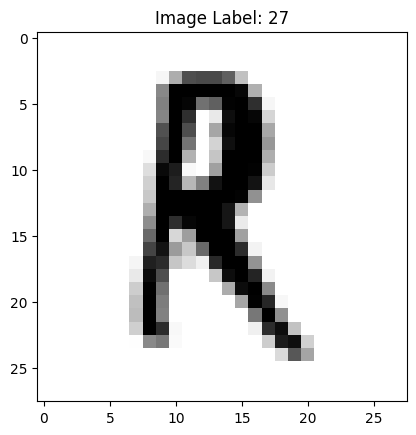

In [139]:
print(f"Label: {label} at index {image_index}")
plt.imshow(image_2d, cmap='gray')
plt.title(f"Image Label: {label}")
plt.show()

In [140]:
# We need to scale the pixel values to [0, 1] range
X_data_normalized = X_data / 255.0

In [141]:
# We split our data into training and testing sets
from sklearn.model_selection import train_test_split

In [142]:
# We will split 80% training and 20% testing
# random_state is set for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_data_normalized, y_data, test_size=0.2, random_state=42)

In [143]:
# We will use a neural network classifier
from sklearn.neural_network import MLPClassifier

In [144]:
model = MLPClassifier(
    hidden_layer_sizes=(128, 64), # Hidden layer size
    max_iter = 2000, # epoch size
    random_state=42,
    verbose=True, # Print progress
)

In [145]:
# We will train our model now
model.fit(X_train, y_train)

Iteration 1, loss = 2.23521546
Iteration 2, loss = 0.98098794
Iteration 3, loss = 0.69596729
Iteration 4, loss = 0.58438621
Iteration 5, loss = 0.52816566
Iteration 6, loss = 0.47668644
Iteration 7, loss = 0.43593333
Iteration 8, loss = 0.41007313
Iteration 9, loss = 0.38129532
Iteration 10, loss = 0.35825128
Iteration 11, loss = 0.34678285
Iteration 12, loss = 0.33243722
Iteration 13, loss = 0.31796841
Iteration 14, loss = 0.30142073
Iteration 15, loss = 0.29150577
Iteration 16, loss = 0.28915255
Iteration 17, loss = 0.26995496
Iteration 18, loss = 0.27117783
Iteration 19, loss = 0.25912004
Iteration 20, loss = 0.25179320
Iteration 21, loss = 0.25311855
Iteration 22, loss = 0.23574240
Iteration 23, loss = 0.23293660
Iteration 24, loss = 0.22120303
Iteration 25, loss = 0.22713781
Iteration 26, loss = 0.21122016
Iteration 27, loss = 0.20578582
Iteration 28, loss = 0.20530933
Iteration 29, loss = 0.20182014
Iteration 30, loss = 0.20963295
Iteration 31, loss = 0.18688537
Iteration 32, los

,hidden_layer_sizes,"(128, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,2000
,shuffle,True
,random_state,42


In [146]:
# We will test our model now
# We will create a prediction for our X_test data set
y_pred = model.predict(X_test)
print(f" our prediction: {y_pred[5:]}")
print(f" our actual: {y_test[5:]}")


 our prediction: [15 10  9 ... 27  3 23]
 our actual: [15 10  9 ... 27  3 23]


In [147]:
# We will calculate the accuracy of our model
from sklearn.metrics import accuracy_score

# accuracy_score calculates the accuracy of our model
# with the help of the true labels (y_test) and our predictions (y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9519011406844107

In [148]:
from sklearn.metrics import classification_report

# We will print a detailed classification report
report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.77      0.88      0.82       172\n           1       0.99      0.94      0.96       167\n           2       0.99      0.99      0.99       174\n           3       0.99      0.97      0.98       172\n           4       0.98      0.98      0.98       176\n           5       0.97      0.99      0.98       172\n           6       0.93      1.00      0.96       160\n           7       1.00      0.97      0.98       183\n           8       0.94      0.96      0.95       172\n           9       0.99      0.96      0.98       170\n          10       0.95      0.98      0.97       170\n          11       0.99      0.92      0.96       164\n          12       0.98      0.95      0.96       181\n          13       0.99      0.96      0.98       169\n          14       0.98      0.96      0.97       180\n          15       0.94      0.98      0.96       147\n          16       0.90      0.96      0.93       178\n       

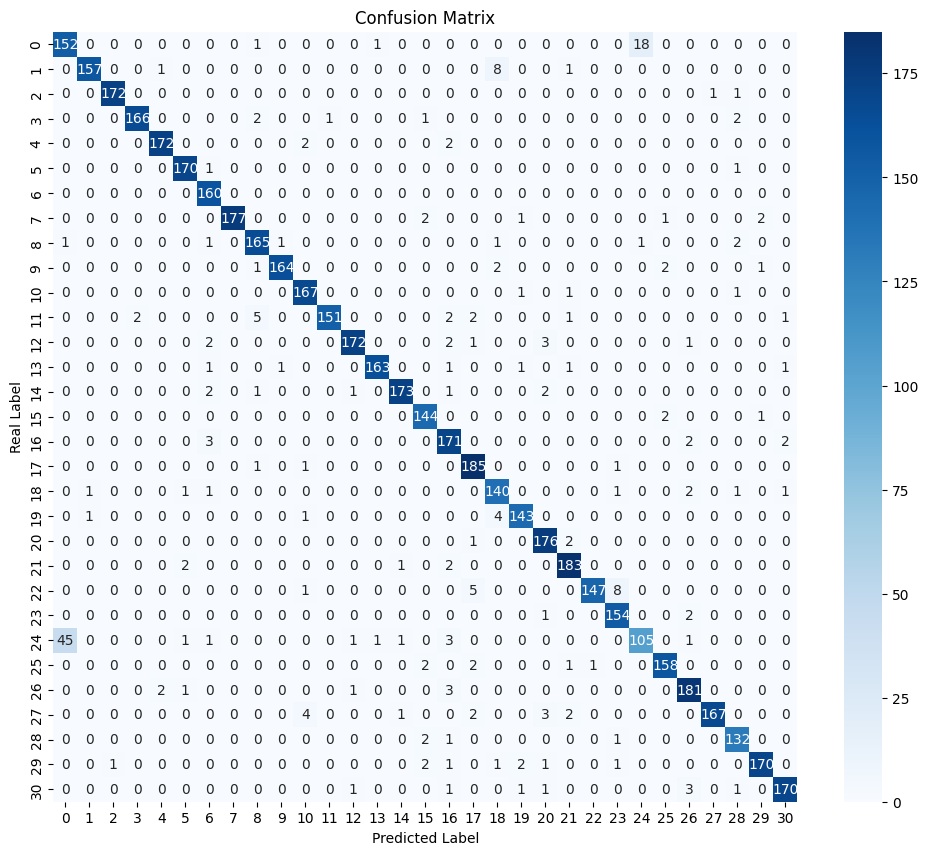

In [149]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# We will create a confusion matrix
# To visualize the performance of our model

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Real Label')
plt.xlabel('Predicted Label')
plt.show()

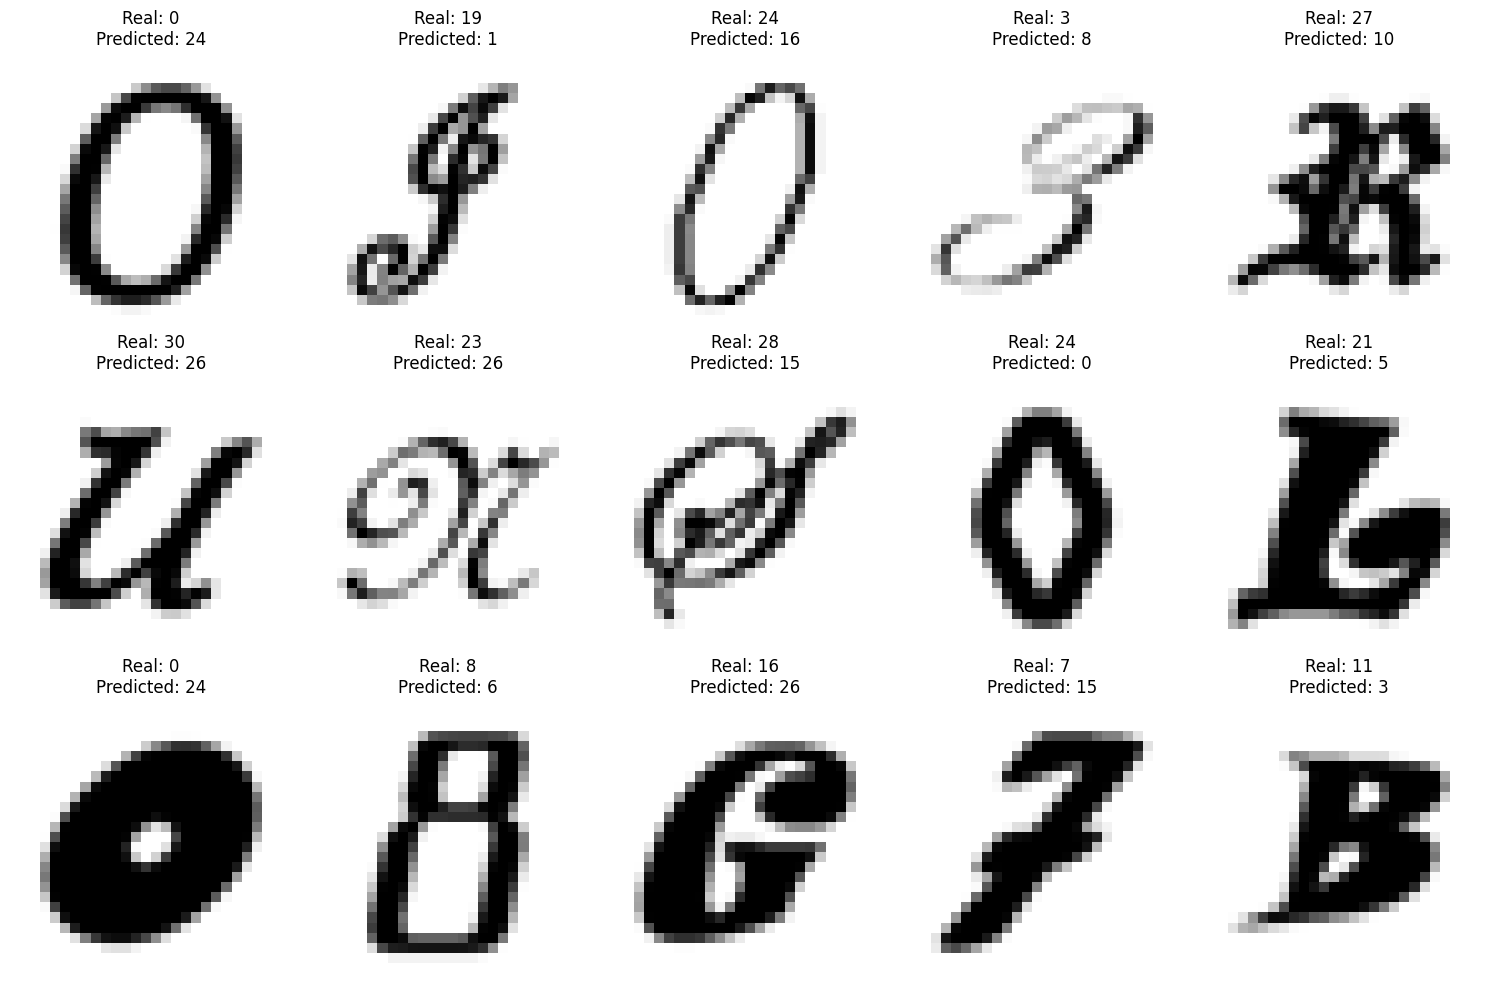

In [150]:
# We will now visalize some of the misclassified images

# We will find the indices of the misclassified images
# A missclassified image is an image that our model predicted incorrectly
misclassified_indices = np.where(y_pred != y_test)[0]

# We will select 20 random misclassified images
random_misclassified = np.random.choice(misclassified_indices, size=20, replace=False)

# We will plot the 20 misclassified images
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    idx = random_misclassified[i]
    image = X_test[idx].reshape((IMG_SIZE, IMG_SIZE)) # Reshape back to 2D

    ax.imshow(image, cmap='gray')
    ax.set_title(f"Real: {y_test[idx]}\nPredicted: {y_pred[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Innentől irtam pár dolgot

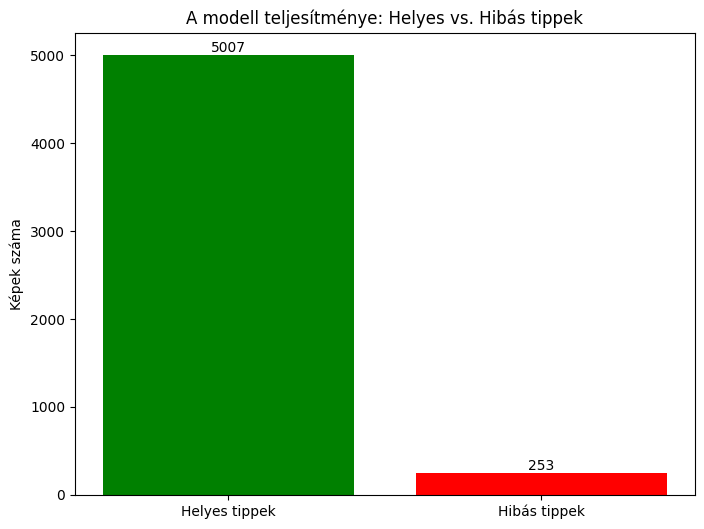

In [209]:
import matplotlib.pyplot as plt
import numpy as np

# Helyes és hibás tippek számának meghatározása
correct_predictions = np.sum(y_pred == y_test)
incorrect_predictions = np.sum(y_pred != y_test)

# Címkék és adatok a diagramhoz
labels = ['Helyes tippek', 'Hibás tippek']
counts = [correct_predictions, incorrect_predictions]
colors = ['green', 'red']

# Diagram létrehozása
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=colors)

# Címkék és cím beállítása
plt.title('A modell teljesítménye: Helyes vs. Hibás tippek')
plt.ylabel('Képek száma')

# Értékek megjelenítése az oszlopok tetején
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

plt.show()

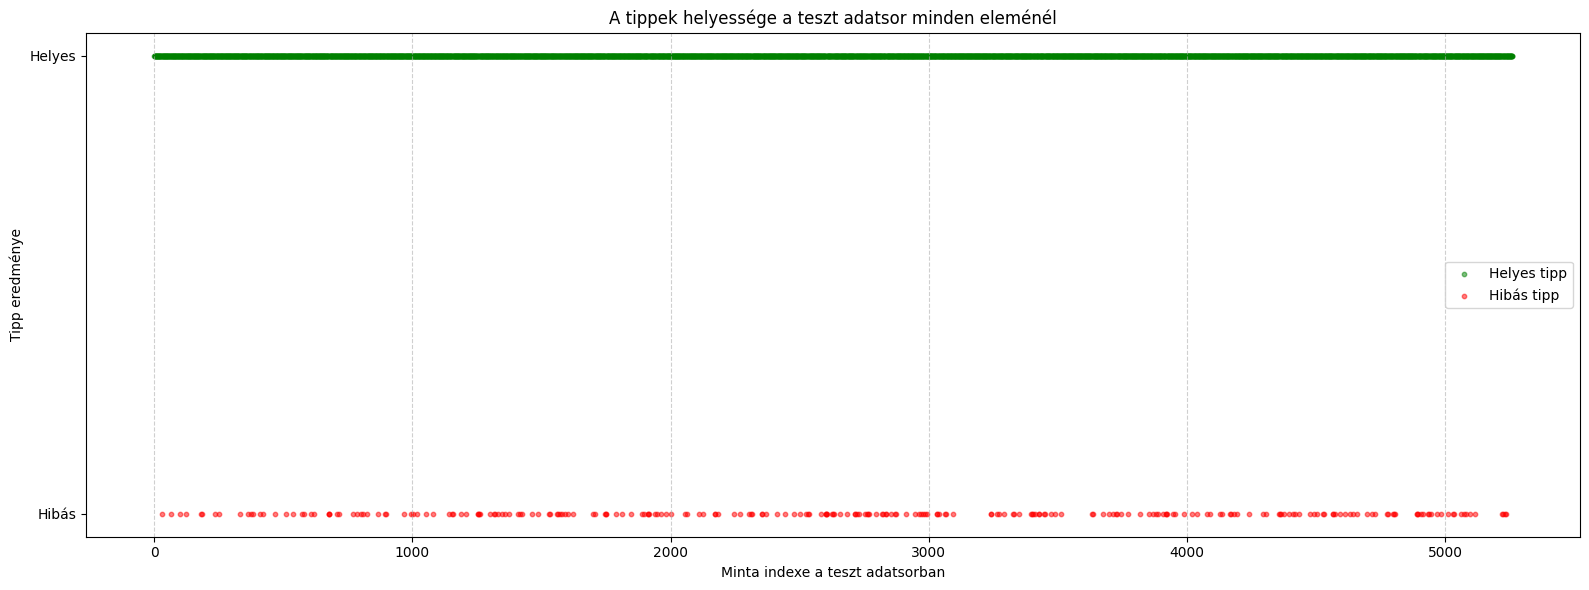

In [210]:
import matplotlib.pyplot as plt
import numpy as np

# Létrehozunk egy tömböt, ami 1-est tartalmaz a helyes és 0-t a hibás tippeknél.
# Ezt használjuk majd az y-tengelyen a vizualizációhoz.
is_correct = (y_pred == y_test).astype(int) # 1 ha helyes, 0 ha hibás

# Létrehozzuk az indexeket az x-tengelyhez
sample_indices = np.arange(len(y_test))

# Különválasztjuk a helyes és hibás tippek indexeit a színezéshez
correct_indices = sample_indices[is_correct == 1]
incorrect_indices = sample_indices[is_correct == 0]

# Diagram létrehozása
plt.figure(figsize=(16, 6))

# Pontdiagram (scatter plot) a helyes és hibás tippek megjelenítésére
# A helyes tippeket (y=1) zölddel, a hibásakat (y=0) pirossal jelöljük.
plt.scatter(correct_indices, np.ones_like(correct_indices), color='green', alpha=0.5, s=10, label='Helyes tipp')
plt.scatter(incorrect_indices, np.zeros_like(incorrect_indices), color='red', alpha=0.5, s=10, label='Hibás tipp')

# Címkék és cím beállítása
plt.title('A tippek helyessége a teszt adatsor minden eleménél')
plt.xlabel('Minta indexe a teszt adatsorban')
plt.ylabel('Tipp eredménye')
plt.yticks([0, 1], ['Hibás', 'Helyes']) # Az y-tengely címkéinek beállítása
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6) # Rácsvonalak az x-tengely mentén
plt.tight_layout()
plt.show()

In [215]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

# Először telepíteni kell a tensorflow-t, ha még nincs meg:
# pip install tensorflow

# --- 1. Adatok előkészítése a CNN számára ---

# A címkék számának meghatározása (pl. 62, ha 0-61-ig vannak címkék)
num_classes = len(np.unique(y_data))

# A lapított képek visszaalakítása 2D formátumra (28x28x1)
# A scikit-learn train_test_split már megtörtént, így az X_train és X_test változókat használjuk
X_train_cnn = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test_cnn = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# A címkék "one-hot" kódolása
y_train_cnn = to_categorical(y_train, num_classes=num_classes)
y_test_cnn = to_categorical(y_test, num_classes=num_classes)

print(f"X_train új formátuma: {X_train_cnn.shape}")
print(f"y_train új formátuma: {y_train_cnn.shape}")

# --- 2. A CNN modell felépítése ---

model_cnn = Sequential([
    # 1. Konvolúciós réteg: 32 szűrő, 3x3-as méretben, 'relu' aktivációval
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    # Max-pooling réteg a méret csökkentésére
    MaxPooling2D(pool_size=(2, 2)),

    # 2. Konvolúciós réteg
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Kilapítás (Flatten), hogy a sűrű rétegek fogadni tudják
    Flatten(),

    # Sűrű (Dense) réteg, mint egy hagyományos neurális hálóban
    Dense(128, activation='relu'),
    # Dropout réteg a túltanulás ellen (a neuronok 50%-át "kikapcsolja" a tanítás során)
    Dropout(0.5),

    # Kimeneti réteg: annyi neuron, ahány osztály van, 'softmax' aktivációval
    Dense(num_classes, activation='softmax')
])

# A modell összefoglalása
model_cnn.summary()

# --- 3. Modell fordítása (Compile) ---
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# --- 4. Modell tanítása ---
print("\nCNN modell tanítása...")
history = model_cnn.fit(X_train_cnn, y_train_cnn,
                        batch_size=128,
                        epochs=10,
                        verbose=1,
                        validation_data=(X_test_cnn, y_test_cnn))

# --- 5. Modell kiértékelése ---
score = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f'\nTest loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

X_train új formátuma: (21040, 28, 28, 1)
y_train új formátuma: (21040, 31)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,743 (889.62 KB)

 Trainable params: 227,743 (889.62 KB)

 Non-trainable params: 0 (0.00 B)


CNN modell tanítása...
Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5093 - loss: 1.7841 - val_accuracy: 0.8842 - val_loss: 0.4469
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8214 - loss: 0.6289 - val_accuracy: 0.9198 - val_loss: 0.2956
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8689 - loss: 0.4497 - val_accuracy: 0.9350 - val_loss: 0.2227
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8928 - loss: 0.3553 - val_accuracy: 0.9420 - val_loss: 0.1892
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9080 - loss: 0.3051 - val_accuracy: 0.9500 - val_loss: 0.1693
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9169 - loss: 0.2698 - val_accuracy: 0.9559 - val_loss: 0.1470
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9216 - loss: 0.2511 - val_accuracy: 0.9567 - val_loss: 0.1448
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9306 -